# Visualisation des données

In [7]:
# Setting working directory
import os
os.chdir('C:/Users/Emilie/Documents/Formation Datascientest/Projet Analyse Pulmonaire/')
# os.chdir('C:/Users/peure/Documents/Formation Datascientest/Projet Analyse Pulmonaire/')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from skimage.metrics import structural_similarity as ssim
import cv2

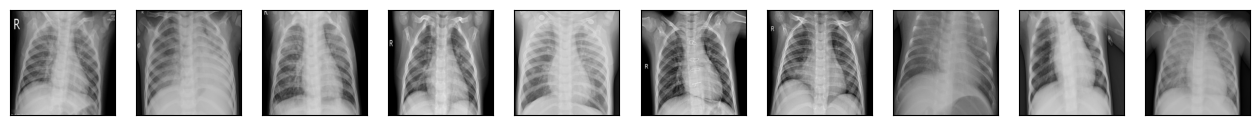

In [17]:
dir_images = "Data/Viral Pneumonia/images"
filenames = [name for name in os.listdir(dir_images)]

viral_pneum_size = len(filenames)
viral_pneum = []
# viral_pneum = torch.zeros(viral_pneum_size, 3, 299, 299, dtype=torch.uint8)
for i, filename in enumerate(filenames):
    viral_pneum.append(cv2.imread(os.path.join(dir_images, filename)))

n_im = 10
fig = plt.figure(figsize=(16, 5))
for i in range(n_im) :
 ax = fig.add_subplot(1, n_im, i+1)
 ax.imshow(viral_pneum[i], cmap='gray')
 plt.xticks([])
 plt.yticks([])

In [21]:
len(viral_pneum)

1345

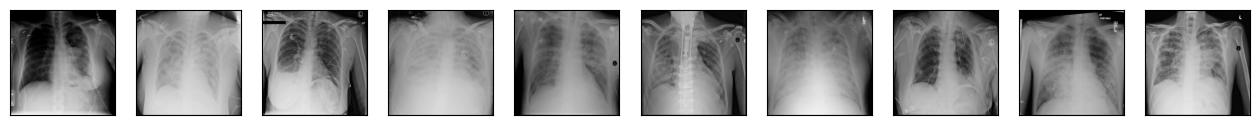

In [22]:
dir_images = "Data/Lung_Opacity/images"
filenames = [name for name in os.listdir(dir_images)]

bact_pneum_size = len(filenames)
bact_pneum = []
for i, filename in enumerate(filenames):
    bact_pneum.append(cv2.imread(os.path.join(dir_images, filename)))

n_im = 10
fig = plt.figure(figsize=(16, 5))
for i in range(n_im) :
 ax = fig.add_subplot(1, n_im, i+1)
 ax.imshow(bact_pneum[i], cmap='gray')
 plt.xticks([])
 plt.yticks([])

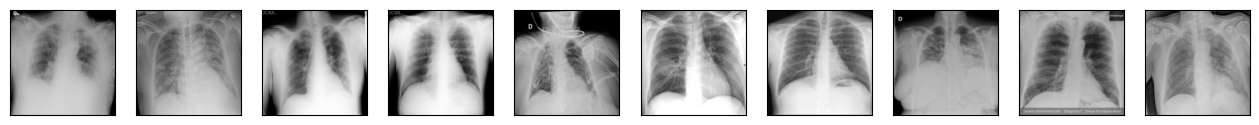

In [24]:
dir_images = "Data/COVID/images"
filenames = [name for name in os.listdir(dir_images)]

covid_size = len(filenames)
covid = []
for i, filename in enumerate(filenames):
    covid.append(cv2.imread(os.path.join(dir_images, filename)))

n_im = 10
fig = plt.figure(figsize=(16, 5))
for i in range(n_im) :
 ax = fig.add_subplot(1, n_im, i+1)
 ax.imshow(covid[i], cmap='gray')
 plt.xticks([])
 plt.yticks([])

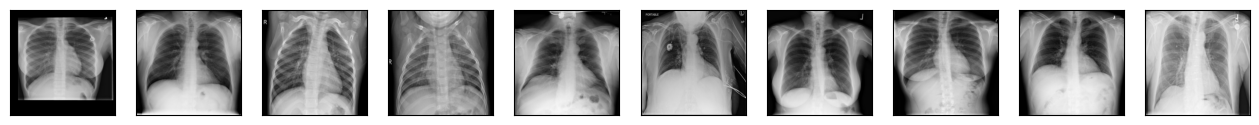

In [25]:
dir_images = "Data/Normal/images"
filenames = [name for name in os.listdir(dir_images)]

normal_size = len(filenames)
normal = []
for i, filename in enumerate(filenames):
    normal.append(cv2.imread(os.path.join(dir_images, filename)))

n_im = 10
fig = plt.figure(figsize=(16, 5))
for i in range(n_im) :
 ax = fig.add_subplot(1, n_im, i+1)
 ax.imshow(normal[i], cmap='gray')
 plt.xticks([])
 plt.yticks([])

# Mesure de contraste

In [97]:
def contrast(img):
    # i1 = (np.max(img) - np.min(img))/(np.max(img) + np.min(img))
    i1 =  (np.max(img) - np.min(img))/(np.diff(np.quantile(img, q=(0,1))))
    i2 = (np.diff(np.quantile(img, q=(0.1,0.9))))/(np.max(img) - np.min(img))
    return i1[0], i2[0]

In [98]:
viral_pneum_contrast = pd.DataFrame([contrast(img) for img in viral_pneum]).rename(columns={0:"i1", 1:"i2"})

           i1           i2
count  1345.0  1345.000000
mean      1.0     0.684938
std       0.0     0.128459
min       1.0     0.232932
25%       1.0     0.600000
50%       1.0     0.698565
75%       1.0     0.784314
max       1.0     0.958848


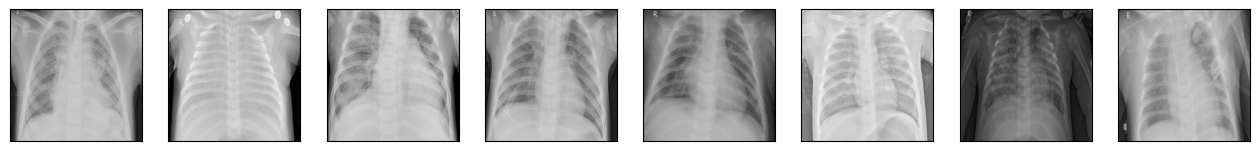

In [109]:
print(viral_pneum_contrast.describe())

low_contrast = viral_pneum_contrast.loc[viral_pneum_contrast.i2<0.4].index

n_im = 8
fig = plt.figure(figsize=(16, 5))
for i in range(n_im) :
 ax = fig.add_subplot(1, n_im, i+1)
 ax.imshow(viral_pneum[low_contrast[i]], cmap='gray')
 plt.xticks([])
 plt.yticks([])